# MBS Correlation Analysis Explorer

This notebook explores the correlation impact analysis results and loan data from the MBS simulation.

## Overview
- **Correlation levels tested**: 0.01, 0.1, 0.2, 0.3, 0.4
- **Simulation paths**: 500 (full analysis)
- **Loan pool size**: 100 loans
- **Tranches**: Subordinate, Mezzanine, Senior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Analysis Data

In [2]:
# Find the most recent analysis files
analysis_dir = Path("analysis_output")
csv_files = list(analysis_dir.glob("*.csv"))
png_files = list(analysis_dir.glob("*.png"))

print(f"Found {len(csv_files)} CSV files and {len(png_files)} PNG files")
print("\nCSV files:")
for f in csv_files:
    print(f"  - {f.name}")
print("\nPNG files:")
for f in png_files:
    print(f"  - {f.name}")

Found 4 CSV files and 1 PNG files

CSV files:
  - correlation_analysis_paths_full_20250902_214006.csv
  - correlation_analysis_summary_full_20250902_214006.csv
  - loan_information_full_20250902_213318.csv
  - loan_information_full_20250902_213318_summary.csv

PNG files:
  - correlation_analysis_full_20250902_214007.png


In [3]:
# Load the most recent summary data
summary_files = [f for f in csv_files if 'summary' in f.name and 'full' in f.name]
latest_summary = max(summary_files, key=lambda x: x.stat().st_mtime)
summary_df = pd.read_csv(latest_summary)

print(f"📊 Loaded summary data: {latest_summary.name}")
print(f"Shape: {summary_df.shape}")
summary_df.head()

📊 Loaded summary data: correlation_analysis_summary_full_20250902_214006.csv
Shape: (15, 14)


,correlation,tranche,avg_payoff,worst_5pct_avg_payoff,worst_1pct_avg_payoff,worst_case_payoff,avg_loss_pct,worst_5pct_avg_loss_pct,worst_1pct_avg_loss_pct,worst_case_loss_pct,avg_default_rate,worst_5pct_avg_default_rate,worst_1pct_avg_default_rate,worst_case_default_rate
0,0.01,Subordinate,3.017985,0.000000,0.000000,0.000000,0.955203,1.000000,1.000000,1.000000,0.051941,0.130108,0.160825,0.201501
1,0.01,Mezzanine,164.461145,0.000000,0.000000,0.000000,-1.441137,1.000000,1.000000,1.000000,0.051941,0.130108,0.160825,0.201501
2,0.01,Senior,6394.626663,6298.796595,6195.326837,6058.306361,-93.917024,-92.494595,-90.958768,-88.924939,0.051941,0.130108,0.160825,0.201501
3,0.10,Subordinate,5.656950,0.000000,0.000000,0.000000,0.934085,1.000000,1.000000,1.000000,0.047988,0.128212,0.156555,0.169519
4,0.10,Mezzanine,223.944455,0.000000,0.000000,0.000000,-1.609391,1.000000,1.000000,1.000000,0.047988,0.128212,0.156555,0.169519


In [4]:
# Load the most recent path data
path_files = [f for f in csv_files if 'paths' in f.name and 'full' in f.name]
latest_paths = max(path_files, key=lambda x: x.stat().st_mtime)
paths_df = pd.read_csv(latest_paths)

print(f"📈 Loaded path data: {latest_paths.name}")
print(f"Shape: {paths_df.shape}")
paths_df.head()

📈 Loaded path data: correlation_analysis_paths_full_20250902_214006.csv
Shape: (7500, 8)


,correlation,tranche,path_id,payoff,loss,loss_percentage,pool_loss_percentage,default_rate
0,0.01,Subordinate,0,0.0,67.370703,1.0,0.015033,0.030066
1,0.01,Subordinate,1,0.0,67.370703,1.0,0.030171,0.060342
2,0.01,Subordinate,2,0.0,67.370703,1.0,0.015314,0.030628
3,0.01,Subordinate,3,0.0,67.370703,1.0,0.042245,0.084491
4,0.01,Subordinate,4,0.0,67.370703,1.0,0.024013,0.048025


In [5]:
# Load loan information
loan_files = [f for f in csv_files if 'loan_information' in f.name and not 'summary' in f.name]
latest_loans = max(loan_files, key=lambda x: x.stat().st_mtime)
loans_df = pd.read_csv(latest_loans)

print(f"🏠 Loaded loan data: {latest_loans.name}")
print(f"Shape: {loans_df.shape}")
loans_df.head()

🏠 Loaded loan data: loan_information_full_20250902_213318.csv
Shape: (100, 13)


,loan_id,principal,remaining_balance,term_years,amortization_years,annual_rate,monthly_rate,annual_prepay_rate,monthly_prepay_rate,annual_default_rate,monthly_default_rate,annual_lgd_rate,monthly_lgd_rate
0,0,60.494788,60.494788,10,30,0.035953,0.002996,0.005044,0.000420,0.009081,0.000757,0.346492,0.346492
1,1,23.950168,23.950168,10,30,0.046097,0.003841,0.009884,0.000824,0.005669,0.000472,0.499806,0.499806
2,2,37.175043,37.175043,10,30,0.044660,0.003722,0.005986,0.000499,0.005024,0.000419,0.257762,0.257762
3,3,36.578114,36.578114,10,30,0.036751,0.003063,0.006725,0.000560,0.008273,0.000689,0.452849,0.452849
4,4,132.437763,132.437763,10,30,0.040854,0.003405,0.010226,0.000852,0.007181,0.000598,0.489734,0.489734


## 2. Explore Loan Pool Characteristics

In [6]:
# Loan pool summary statistics
print("🏠 LOAN POOL CHARACTERISTICS")
print("=" * 50)

print(f"Total loans: {len(loans_df)}")
print(f"Total principal: ${loans_df['principal'].sum():,.0f}")
print(f"Average loan size: ${loans_df['principal'].mean():,.0f}")
print(f"Min loan size: ${loans_df['principal'].min():,.0f}")
print(f"Max loan size: ${loans_df['principal'].max():,.0f}")
print(f"Standard deviation: ${loans_df['principal'].std():,.0f}")
print(f"Average annual rate: {loans_df['annual_rate'].mean():.2%}")
print(f"Average term: {loans_df['term_years'].mean():.1f} years")

🏠 LOAN POOL CHARACTERISTICS
Total loans: 100
Total principal: $6,737
Average loan size: $67
Min loan size: $2
Max loan size: $500
Standard deviation: $92
Average annual rate: 4.51%
Average term: 10.0 years


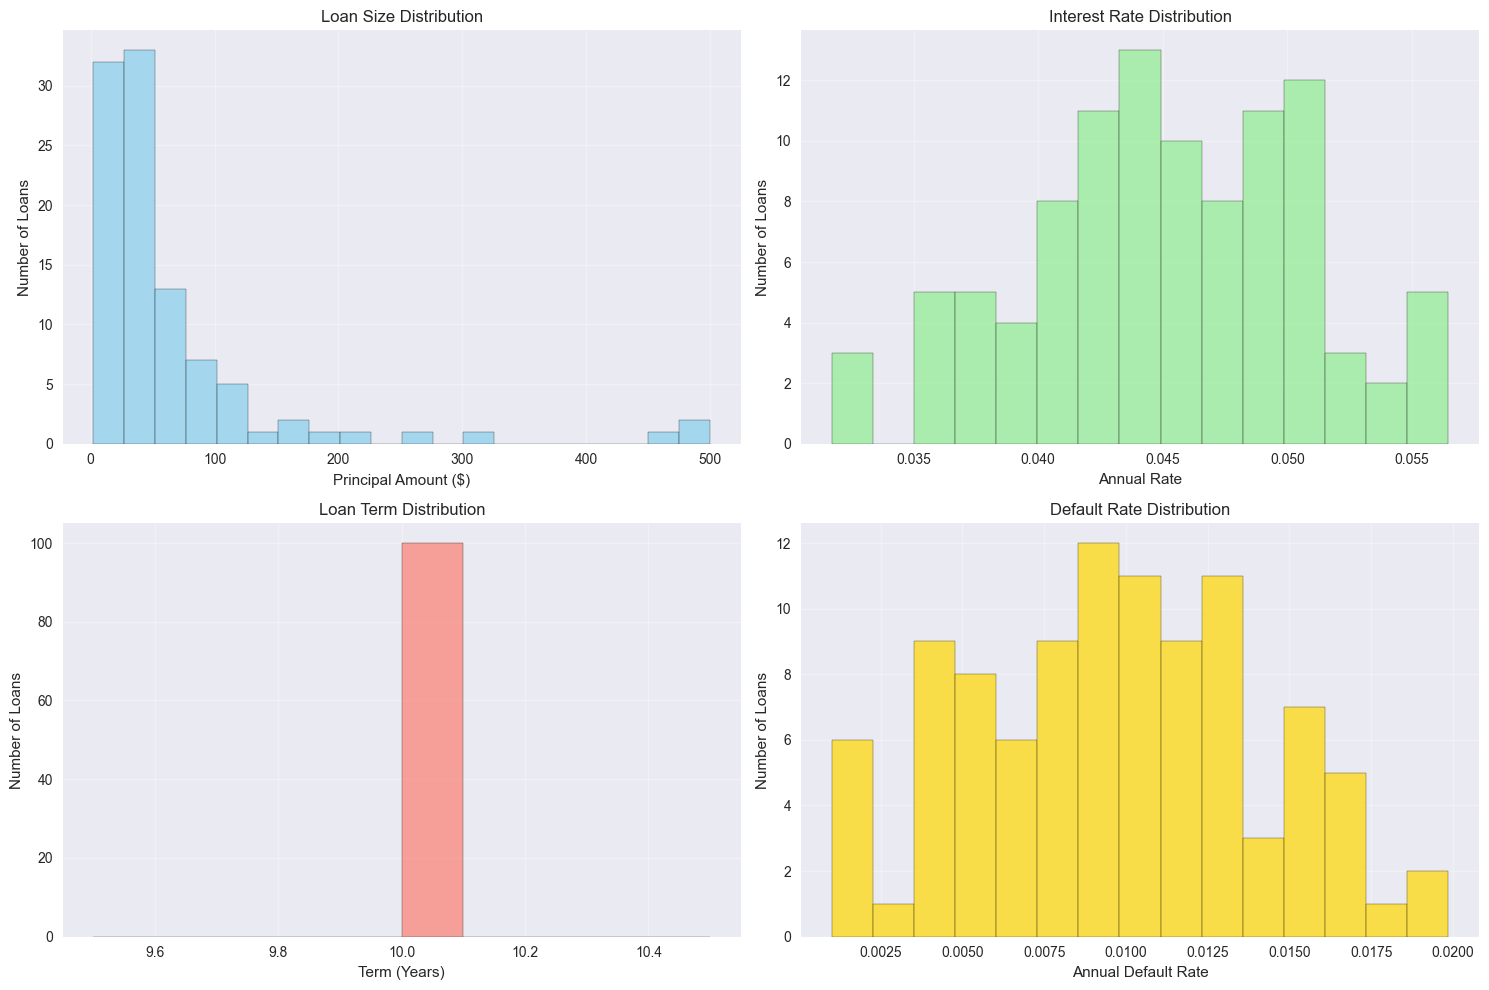

In [7]:
# Visualize loan distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loan size distribution
axes[0,0].hist(loans_df['principal'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Loan Size Distribution')
axes[0,0].set_xlabel('Principal Amount ($)')
axes[0,0].set_ylabel('Number of Loans')
axes[0,0].grid(True, alpha=0.3)

# Interest rate distribution
axes[0,1].hist(loans_df['annual_rate'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Interest Rate Distribution')
axes[0,1].set_xlabel('Annual Rate')
axes[0,1].set_ylabel('Number of Loans')
axes[0,1].grid(True, alpha=0.3)

# Term distribution
axes[1,0].hist(loans_df['term_years'], bins=10, alpha=0.7, color='salmon', edgecolor='black')
axes[1,0].set_title('Loan Term Distribution')
axes[1,0].set_xlabel('Term (Years)')
axes[1,0].set_ylabel('Number of Loans')
axes[1,0].grid(True, alpha=0.3)

# Default rate distribution
axes[1,1].hist(loans_df['annual_default_rate'], bins=15, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Default Rate Distribution')
axes[1,1].set_xlabel('Annual Default Rate')
axes[1,1].set_ylabel('Number of Loans')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Correlation Impact Analysis

In [8]:
# Summary statistics by correlation and tranche
print("📊 CORRELATION IMPACT SUMMARY")
print("=" * 60)

# Pivot table for average payoffs
pivot_payoff = summary_df.pivot_table(
    values='avg_payoff', 
    index='correlation', 
    columns='tranche', 
    aggfunc='mean'
)

print("\nAverage Payoffs by Correlation and Tranche:")
print(pivot_payoff.round(0))

# Pivot table for worst 1% payoffs
pivot_worst1 = summary_df.pivot_table(
    values='worst_1pct_avg_payoff', 
    index='correlation', 
    columns='tranche', 
    aggfunc='mean'
)

print("\nWorst 1% Payoffs by Correlation and Tranche:")
print(pivot_worst1.round(0))

📊 CORRELATION IMPACT SUMMARY

Average Payoffs by Correlation and Tranche:
tranche      Mezzanine  Senior  Subordinate
correlation                                
0.01             164.0  6395.0          3.0
0.10             224.0  8147.0          6.0
0.20             169.0  6284.0          2.0
0.30             194.0  7597.0          3.0
0.40             177.0  6632.0          4.0

Worst 1% Payoffs by Correlation and Tranche:
tranche      Mezzanine  Senior  Subordinate
correlation                                
0.01               0.0  6195.0          0.0
0.10               0.0  7910.0          0.0
0.20               0.0  6124.0          0.0
0.30               0.0  7440.0          0.0
0.40               0.0  6522.0          0.0


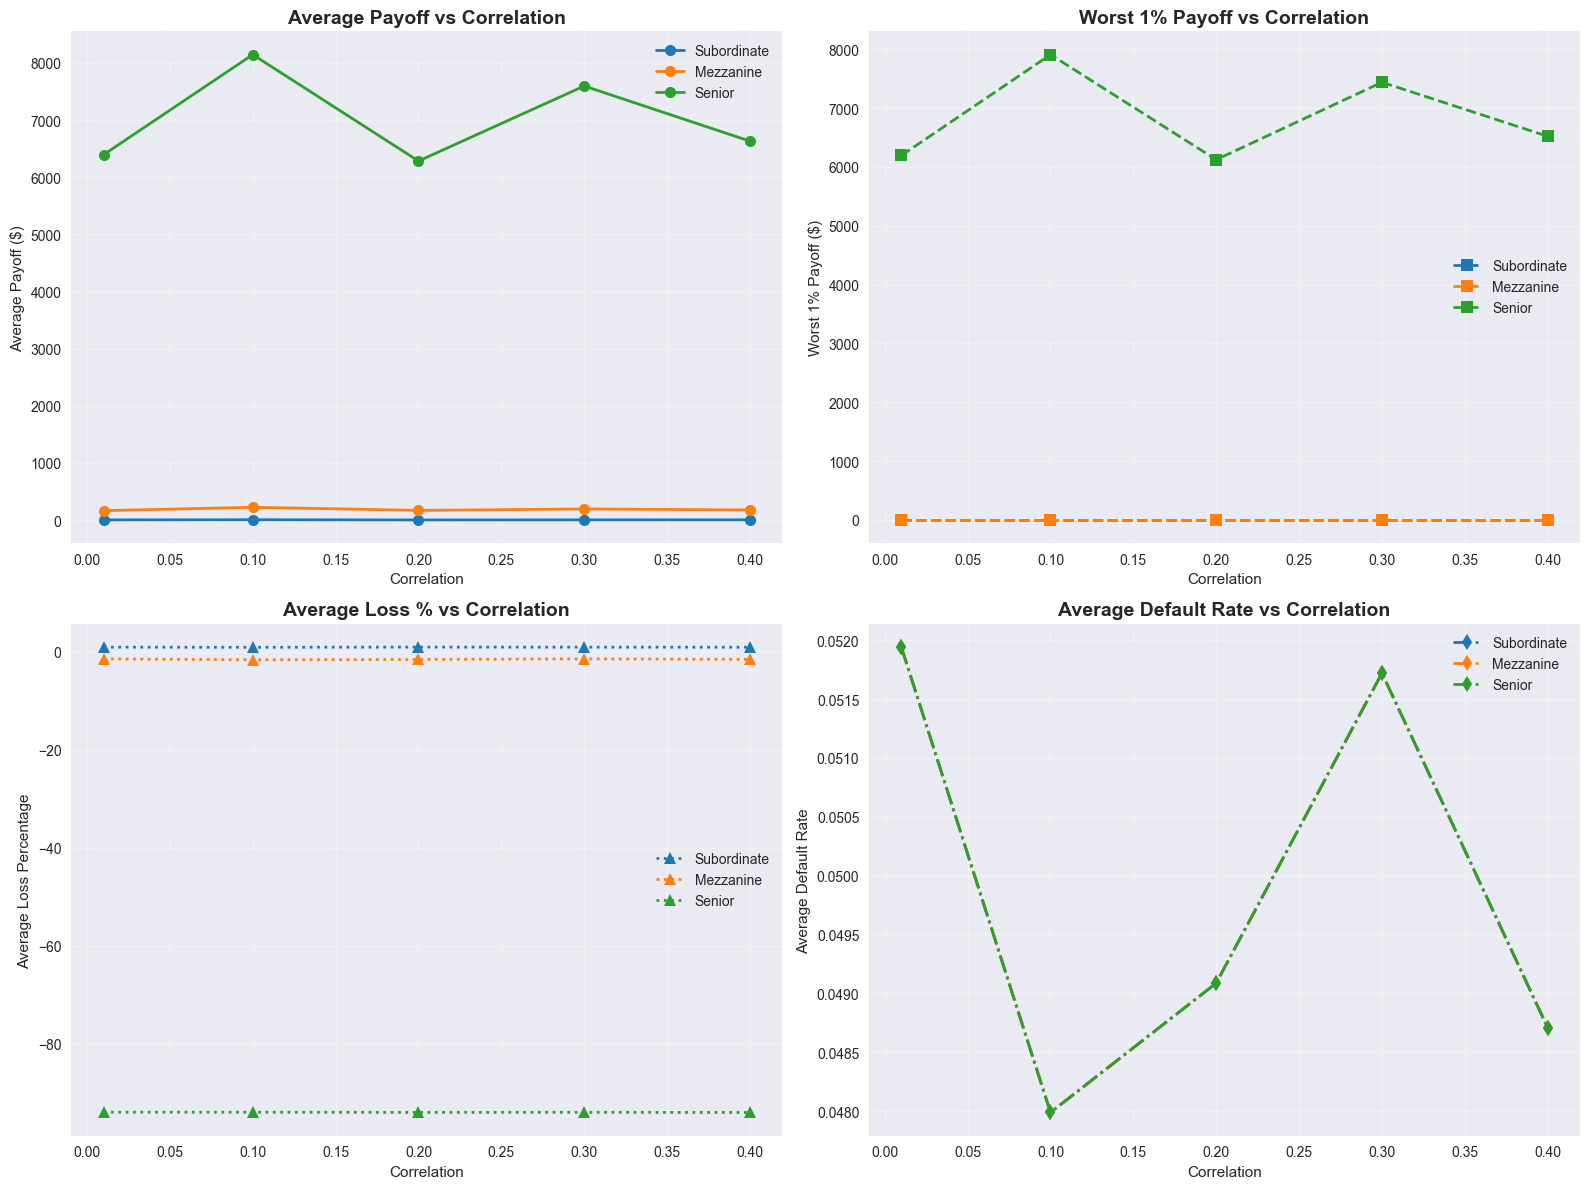

In [9]:
# Visualize correlation impact on payoffs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

tranches = ['Subordinate', 'Mezzanine', 'Senior']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Average payoff vs correlation
for i, tranche in enumerate(tranches):
    tranche_data = summary_df[summary_df['tranche'] == tranche]
    axes[0,0].plot(tranche_data['correlation'], tranche_data['avg_payoff'], 
                   'o-', label=tranche, color=colors[i], linewidth=2, markersize=8)

axes[0,0].set_title('Average Payoff vs Correlation', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Correlation')
axes[0,0].set_ylabel('Average Payoff ($)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Worst 1% payoff vs correlation
for i, tranche in enumerate(tranches):
    tranche_data = summary_df[summary_df['tranche'] == tranche]
    axes[0,1].plot(tranche_data['correlation'], tranche_data['worst_1pct_avg_payoff'], 
                   's--', label=tranche, color=colors[i], linewidth=2, markersize=8)

axes[0,1].set_title('Worst 1% Payoff vs Correlation', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Correlation')
axes[0,1].set_ylabel('Worst 1% Payoff ($)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Loss percentage vs correlation
for i, tranche in enumerate(tranches):
    tranche_data = summary_df[summary_df['tranche'] == tranche]
    axes[1,0].plot(tranche_data['correlation'], tranche_data['avg_loss_pct'], 
                   '^:', label=tranche, color=colors[i], linewidth=2, markersize=8)

axes[1,0].set_title('Average Loss % vs Correlation', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Correlation')
axes[1,0].set_ylabel('Average Loss Percentage')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Default rate vs correlation
for i, tranche in enumerate(tranches):
    tranche_data = summary_df[summary_df['tranche'] == tranche]
    axes[1,1].plot(tranche_data['correlation'], tranche_data['avg_default_rate'], 
                   'd-.', label=tranche, color=colors[i], linewidth=2, markersize=8)

axes[1,1].set_title('Average Default Rate vs Correlation', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Correlation')
axes[1,1].set_ylabel('Average Default Rate')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Path-Level Analysis

In [12]:
# Analyze path-level data
print("📈 PATH-LEVEL ANALYSIS")
print("=" * 40)

print(f"Total simulation paths: {len(paths_df)}")
print(f"Paths per correlation: {len(paths_df) // len(paths_df['correlation'].unique())}")
print(f"Correlations tested: {sorted(paths_df['correlation'].unique())}")
print(f"Tranches: {paths_df['tranche'].unique()}")

# Path-level statistics by correlation
path_stats = paths_df.groupby(['correlation', 'tranche']).agg({
    'payoff': ['mean', 'std', 'min', 'max'],
    'loss_pct': ['mean', 'std', 'min', 'max']
}).round(2)

print("\nPath-level statistics:")
print(path_stats)

📈 PATH-LEVEL ANALYSIS
Total simulation paths: 7500
Paths per correlation: 1500
Correlations tested: [np.float64(0.01), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4)]
Tranches: ['Subordinate' 'Mezzanine' 'Senior']


KeyError: "Column(s) ['loss_pct'] do not exist"

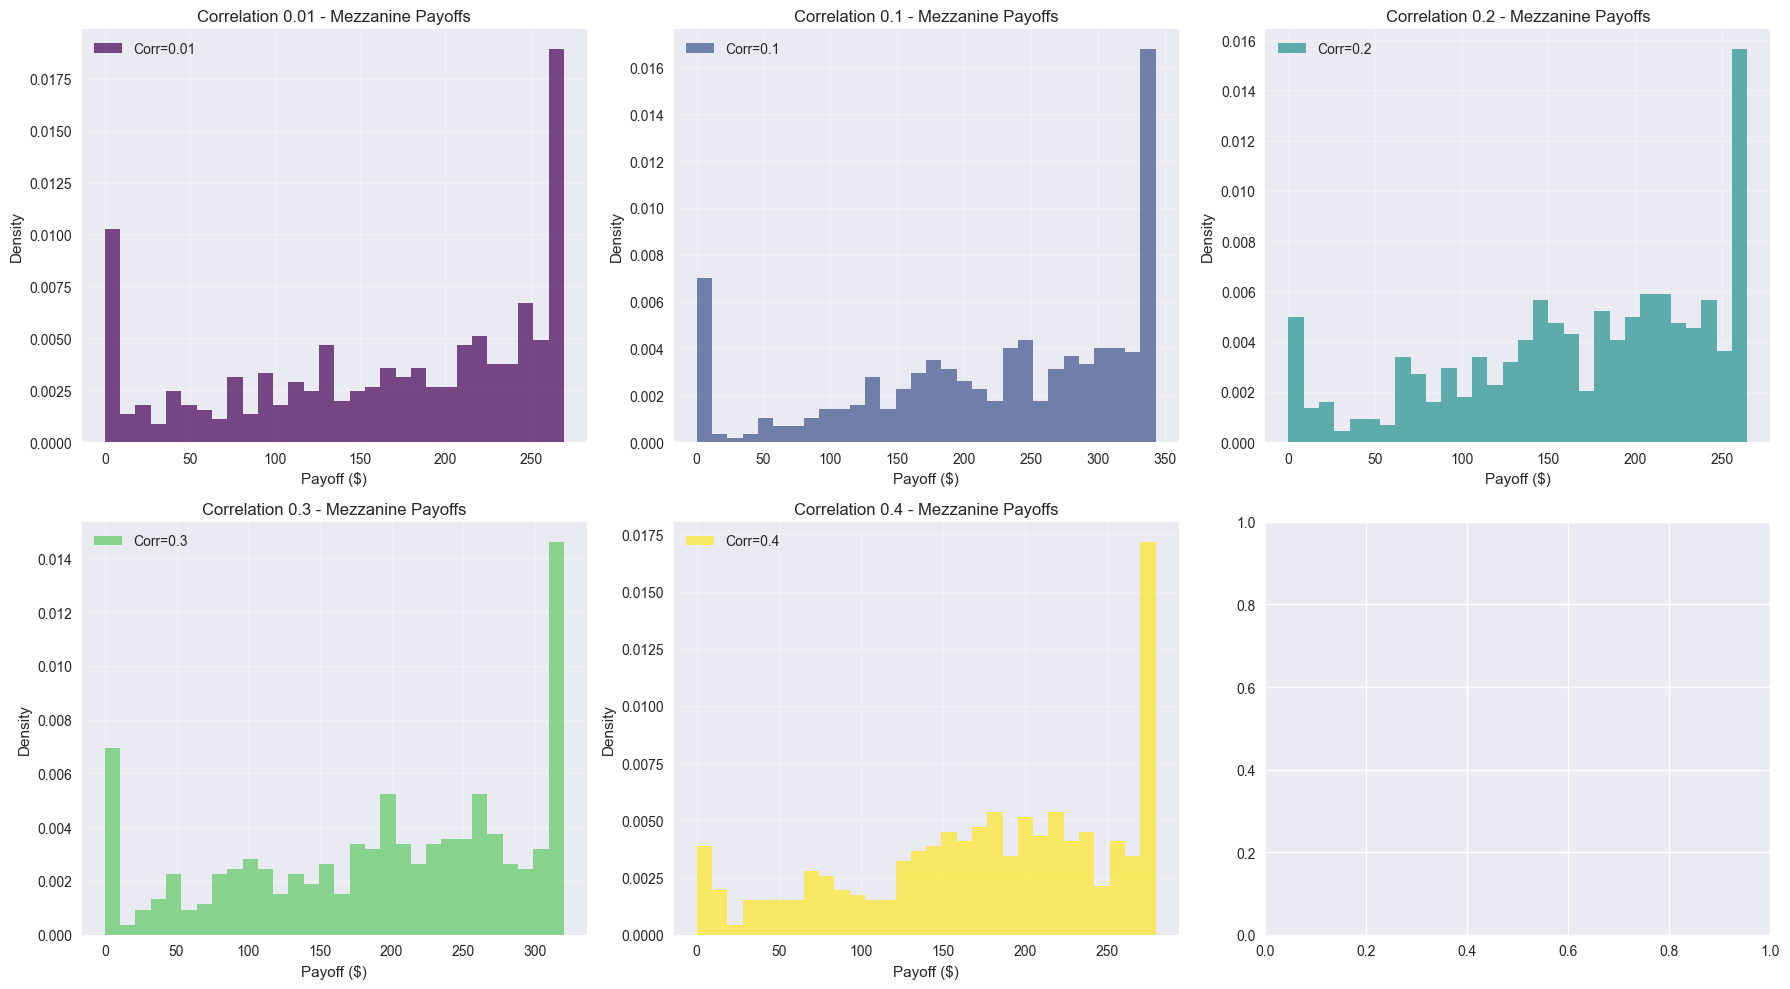

In [13]:
# Distribution of payoffs by correlation
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

correlations = sorted(paths_df['correlation'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(correlations)))

for i, corr in enumerate(correlations):
    corr_data = paths_df[paths_df['correlation'] == corr]
    
    # Mezzanine tranche payoffs
    mezz_data = corr_data[corr_data['tranche'] == 'Mezzanine']['payoff']
    axes[i].hist(mezz_data, bins=30, alpha=0.7, density=True, 
                 color=colors[i], label=f'Corr={corr}')
    axes[i].set_title(f'Correlation {corr} - Mezzanine Payoffs')
    axes[i].set_xlabel('Payoff ($)')
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.show()

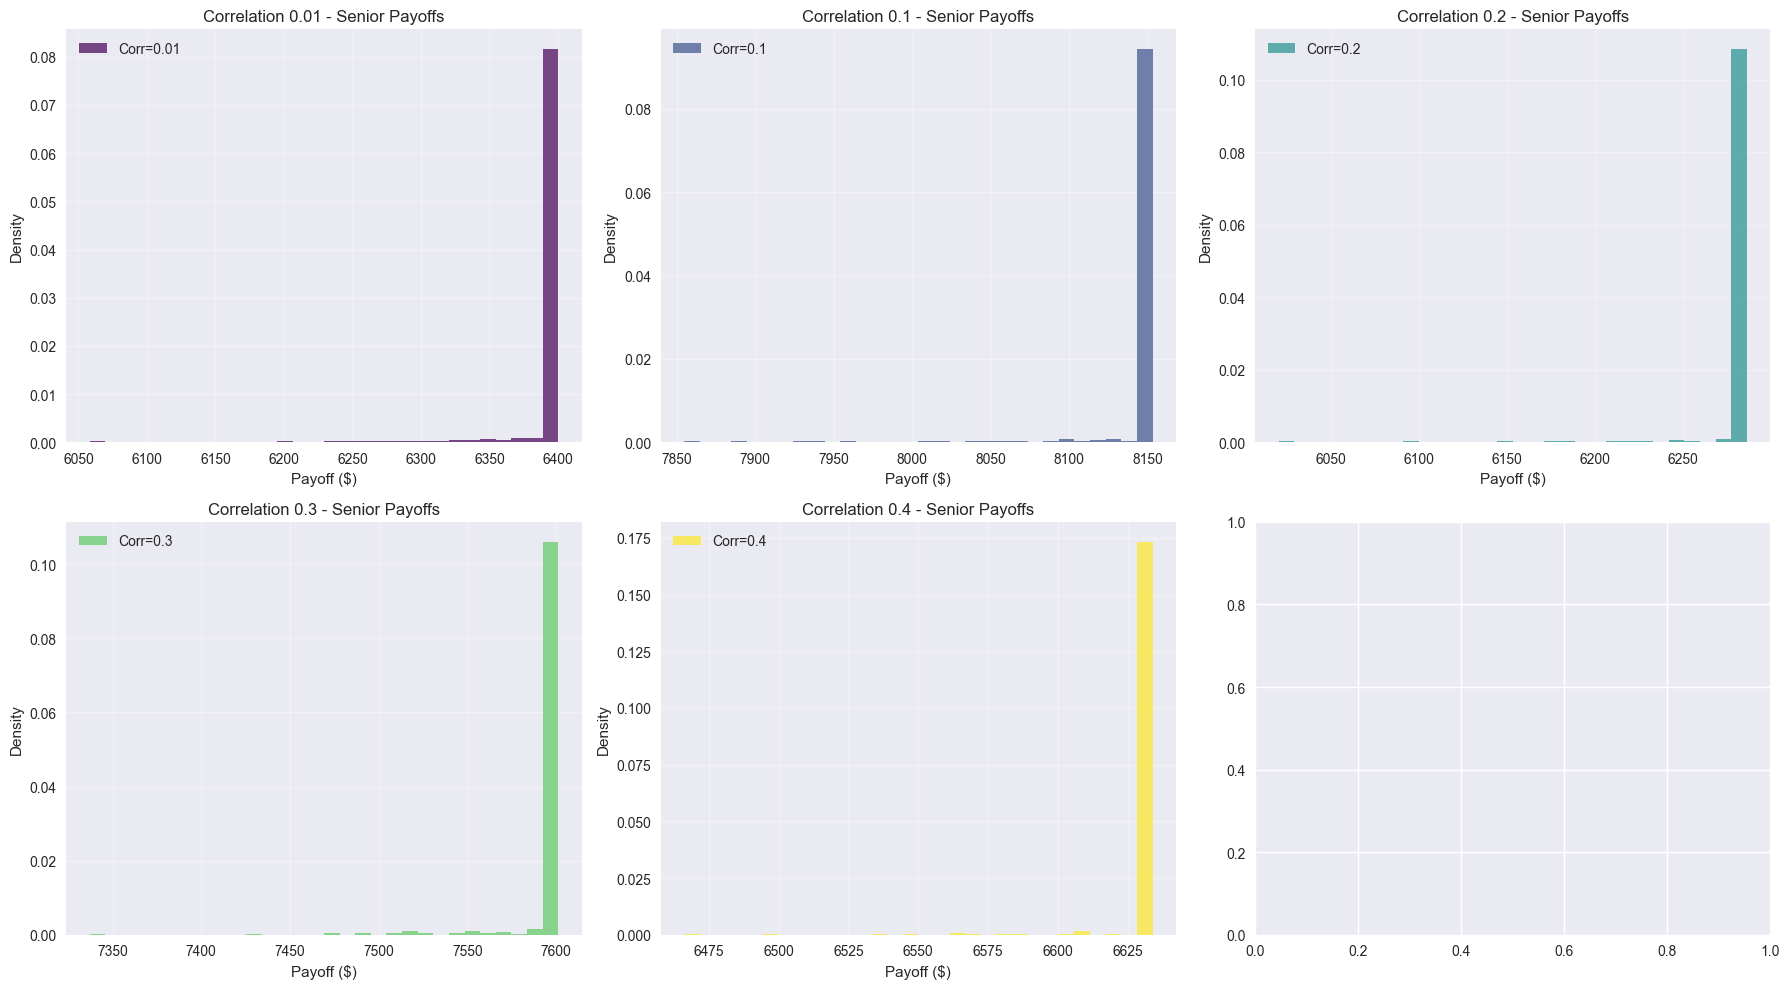

In [14]:
# Distribution of payoffs by correlation
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

correlations = sorted(paths_df['correlation'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(correlations)))

for i, corr in enumerate(correlations):
    corr_data = paths_df[paths_df['correlation'] == corr]
    
    # Mezzanine tranche payoffs
    mezz_data = corr_data[corr_data['tranche'] == 'Senior']['payoff']
    axes[i].hist(mezz_data, bins=30, alpha=0.7, density=True, 
                 color=colors[i], label=f'Corr={corr}')
    axes[i].set_title(f'Correlation {corr} - Senior Payoffs')
    axes[i].set_xlabel('Payoff ($)')
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.show()

## 5. Risk Metrics Analysis

In [ ]:
# Calculate and visualize risk metrics
print("⚠️ RISK METRICS ANALYSIS")
print("=" * 40)

# Calculate VaR and Expected Shortfall for each correlation
risk_metrics = {}

for corr in correlations:
    corr_data = paths_df[paths_df['correlation'] == corr]
    mezz_payoffs = corr_data[corr_data['tranche'] == 'Mezzanine']['payoff']
    
    var_95 = np.percentile(mezz_payoffs, 5)
    var_99 = np.percentile(mezz_payoffs, 1)
    es_95 = np.mean(mezz_payoffs[mezz_payoffs <= var_95])
    es_99 = np.mean(mezz_payoffs[mezz_payoffs <= var_99])
    
    risk_metrics[corr] = {
        'var_95': var_95,
        'var_99': var_99,
        'es_95': es_95,
        'es_99': es_99,
        'mean': np.mean(mezz_payoffs),
        'std': np.std(mezz_payoffs)
    }

risk_df = pd.DataFrame(risk_metrics).T
print("\nRisk Metrics for Mezzanine Tranche:")
print(risk_df.round(0))

In [ ]:
# Visualize risk metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# VaR comparison
axes[0,0].plot(risk_df.index, risk_df['var_95'], 'o-', label='95% VaR', linewidth=2, markersize=8)
axes[0,0].plot(risk_df.index, risk_df['var_99'], 's--', label='99% VaR', linewidth=2, markersize=8)
axes[0,0].set_title('Value at Risk vs Correlation', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Correlation')
axes[0,0].set_ylabel('VaR ($)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Expected Shortfall comparison
axes[0,1].plot(risk_df.index, risk_df['es_95'], 'o-', label='95% ES', linewidth=2, markersize=8)
axes[0,1].plot(risk_df.index, risk_df['es_99'], 's--', label='99% ES', linewidth=2, markersize=8)
axes[0,1].set_title('Expected Shortfall vs Correlation', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Correlation')
axes[0,1].set_ylabel('Expected Shortfall ($)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Mean and Standard Deviation
axes[1,0].plot(risk_df.index, risk_df['mean'], 'o-', label='Mean', linewidth=2, markersize=8)
axes[1,0].set_title('Mean Payoff vs Correlation', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Correlation')
axes[1,0].set_ylabel('Mean Payoff ($)')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(risk_df.index, risk_df['std'], 's--', label='Std Dev', linewidth=2, markersize=8)
axes[1,1].set_title('Standard Deviation vs Correlation', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Correlation')
axes[1,1].set_ylabel('Standard Deviation ($)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Interactive Analysis Functions

In [ ]:
def analyze_correlation_impact(correlation_value):
    """Analyze the impact of a specific correlation value"""
    
    print(f"🔍 ANALYSIS FOR CORRELATION {correlation_value}")
    print("=" * 50)
    
    # Filter data for this correlation
    corr_data = summary_df[summary_df['correlation'] == correlation_value]
    
    if len(corr_data) == 0:
        print(f"❌ No data found for correlation {correlation_value}")
        return
    
    # Display tranche performance
    for _, row in corr_data.iterrows():
        print(f"\n{row['tranche']} Tranche:")
        print(f"  Average Payoff: ${row['avg_payoff']:,.0f}")
        print(f"  Worst 5% Payoff: ${row['worst_5pct_avg_payoff']:,.0f}")
        print(f"  Worst 1% Payoff: ${row['worst_1pct_avg_payoff']:,.0f}")
        print(f"  Average Loss %: {row['avg_loss_pct']:.2%}")
        print(f"  Average Default Rate: {row['avg_default_rate']:.2%}")
    
    # Path-level analysis
    path_corr_data = paths_df[paths_df['correlation'] == correlation_value]
    mezz_payoffs = path_corr_data[path_corr_data['tranche'] == 'Mezzanine']['payoff']
    
    print(f"\n📈 Path-level Statistics (Mezzanine):")
    print(f"  Number of paths: {len(mezz_payoffs)}")
    print(f"  Mean payoff: ${np.mean(mezz_payoffs):,.0f}")
    print(f"  Std deviation: ${np.std(mezz_payoffs):,.0f}")
    print(f"  Min payoff: ${np.min(mezz_payoffs):,.0f}")
    print(f"  Max payoff: ${np.max(mezz_payoffs):,.0f}")
    print(f"  95% VaR: ${np.percentile(mezz_payoffs, 5):,.0f}")
    print(f"  99% VaR: ${np.percentile(mezz_payoffs, 1):,.0f}")

# Example usage
analyze_correlation_impact(0.2)

In [ ]:
def compare_tranches(correlation_value):
    """Compare performance across all tranches for a given correlation"""
    
    print(f"🔄 TRANCHE COMPARISON FOR CORRELATION {correlation_value}")
    print("=" * 60)
    
    corr_data = summary_df[summary_df['correlation'] == correlation_value]
    
    if len(corr_data) == 0:
        print(f"❌ No data found for correlation {correlation_value}")
        return
    
    # Create comparison table
    comparison_data = []
    for _, row in corr_data.iterrows():
        comparison_data.append({
            'Tranche': row['tranche'],
            'Avg Payoff': f"${row['avg_payoff']:,.0f}",
            'Worst 1%': f"${row['worst_1pct_avg_payoff']:,.0f}",
            'Loss %': f"{row['avg_loss_pct']:.2%}",
            'Default Rate': f"{row['avg_default_rate']:.2%}"
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))
    
    # Visualize comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    metrics = ['avg_payoff', 'worst_1pct_avg_payoff', 'avg_loss_pct', 'avg_default_rate']
    titles = ['Average Payoff', 'Worst 1% Payoff', 'Average Loss %', 'Average Default Rate']
    
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        values = corr_data[metric].values
        tranches = corr_data['tranche'].values
        
        axes[i//2, i%2].bar(tranches, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
        axes[i//2, i%2].set_title(f'{title} by Tranche')
        axes[i//2, i%2].set_ylabel('Value')
        axes[i//2, i%2].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for j, v in enumerate(values):
            if metric in ['avg_loss_pct', 'avg_default_rate']:
                axes[i//2, i%2].text(j, v, f'{v:.2%}', ha='center', va='bottom')
            else:
                axes[i//2, i%2].text(j, v, f'${v:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Example usage
compare_tranches(0.3)

## 7. Summary and Key Insights

In [ ]:
# Generate summary insights
print("📋 KEY INSIGHTS FROM CORRELATION ANALYSIS")
print("=" * 60)

# Correlation sensitivity analysis
mezz_data = summary_df[summary_df['tranche'] == 'Mezzanine']
baseline_payoff = mezz_data[mezz_data['correlation'] == 0.01]['avg_payoff'].iloc[0]

print("\n🔍 Correlation Sensitivity (Mezzanine Tranche):")
for _, row in mezz_data.iterrows():
    pct_change = (row['avg_payoff'] - baseline_payoff) / baseline_payoff * 100
    print(f"  Correlation {row['correlation']}: {pct_change:+.1f}% change from baseline")

# Risk ranking by correlation
print("\n⚠️ Risk Ranking by Correlation (Mezzanine):")
worst_1pct_ranking = mezz_data.sort_values('worst_1pct_avg_payoff')
for i, (_, row) in enumerate(worst_1pct_ranking.iterrows()):
    print(f"  {i+1}. Correlation {row['correlation']}: ${row['worst_1pct_avg_payoff']:,.0f}")

# Tranche performance comparison
print("\n🏆 Best Performing Tranche by Metric:")
for corr in sorted(summary_df['correlation'].unique()):
    corr_data = summary_df[summary_df['correlation'] == corr]
    best_tranche = corr_data.loc[corr_data['avg_payoff'].idxmax(), 'tranche']
    print(f"  Correlation {corr}: {best_tranche} tranche has highest average payoff")

print("\n✅ Analysis complete! Use the interactive functions above for deeper exploration.")